In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import warnings

# DATASET - A

Social circles: Facebook

In [2]:
# Specify the file path
file_path = 'facebook_combined.txt'

# Read the network from the text file
G = nx.read_edgelist(file_path)

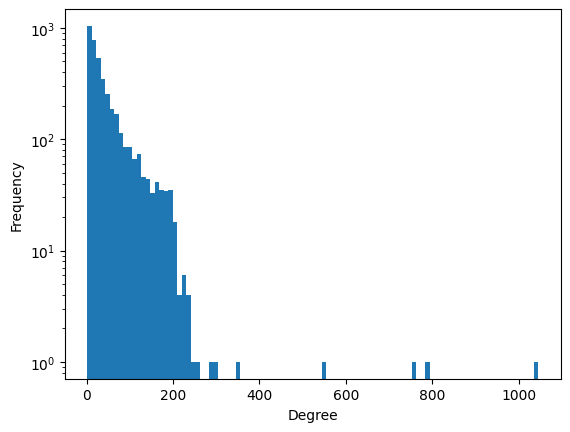

In [3]:
# Calculate the degree distribution for all nodes
degrees = [G.degree(node) for node in G.nodes()]

# Plot the degree distribution as a histogram
plt.hist(degrees, bins=100,log=True)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [4]:
# Find the node with the lowest degree
min_degree_node = min(G.nodes(), key=G.degree)
min_degree = G.degree(min_degree_node)

print("Node with lowest degree:", min_degree_node)
print("Minimum degree of any node:", min_degree)


# Find the node with the highest degree
max_degree_node = max(G.nodes(), key=G.degree)
max_degree = G.degree(max_degree_node)

print("Node with highest degree:", max_degree_node)
print("Maximum degree of any node:", max_degree)


# Calculate the average degree of the network
total_degree = sum(dict(G.degree()).values())
average_degree = total_degree / len(G)
print("Average degree of the network:", average_degree)

# Calculate average local clustering coefficient
avg_local_clustering = nx.average_clustering(G)
print("Average Local Clustering Coefficient:", avg_local_clustering)

# Calculate global clustering coefficient (transitivity)
transitivity_value = nx.transitivity(G)
print("Global Clustering Coefficient / Transitivity of the network:", transitivity_value)

Node with lowest degree: 11
Minimum degree of any node: 1
Node with highest degree: 107
Maximum degree of any node: 1045
Average degree of the network: 43.69101262688784
Average Local Clustering Coefficient: 0.6055467186200876
Global Clustering Coefficient / Transitivity of the network: 0.5191742775433075


# Consider 6 Centrality Measures mentioned below for the nodes in the network

■ Degree Centrality
■ EigenVector Centrality
■ Katz Centrality
■ PageRank Centrality
■ Betweenness Centrality
■ Closeness Centrality

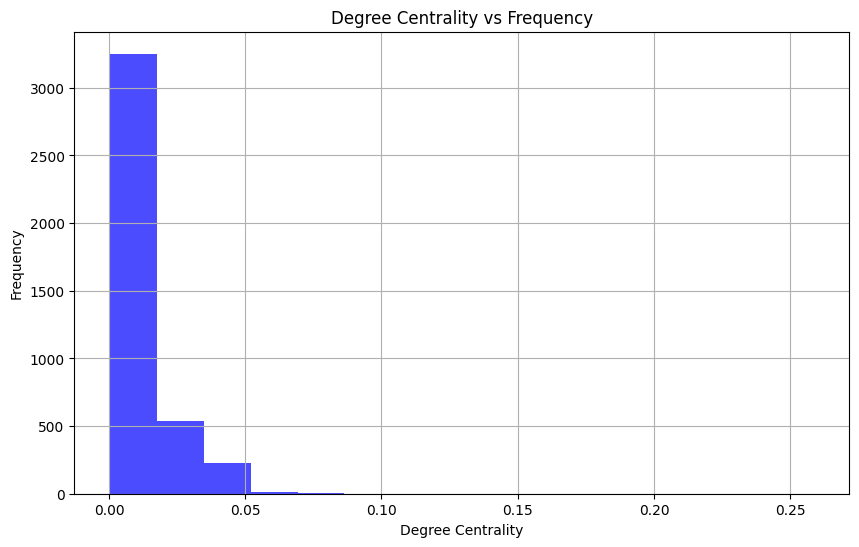

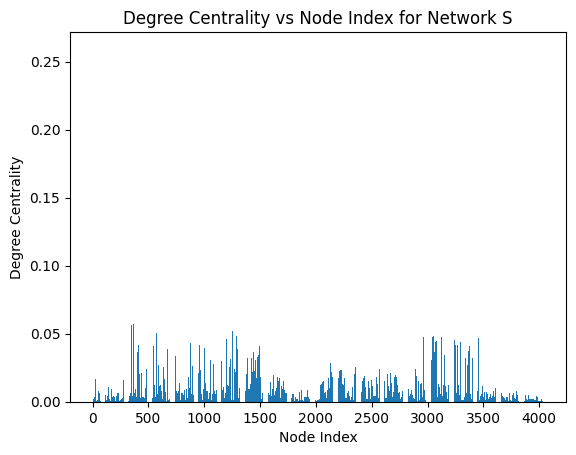

      Degree Centrality
107            0.258791
1684           0.196137
1912           0.186974
3437           0.135463
0              0.085934
2543           0.072808
2347           0.072065
1888           0.062902
1800           0.060674
1663           0.058197


In [5]:
# Calculate degree centrality for all nodes
degree_centrality = nx.degree_centrality(G)

# Plotting degree centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(degree_centrality.values(), bins=15, color='blue', alpha=0.7)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality vs Frequency')
plt.grid(True)
plt.show()

# Create a bar chart to visualize degree centrality vs node index
fig, ax = plt.subplots()
ax.bar(range(len(degree_centrality)), list(degree_centrality.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Degree Centrality')
ax.set_title('Degree Centrality vs Node Index for Network S')
plt.show()


# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['Degree Centrality'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='Degree Centrality', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

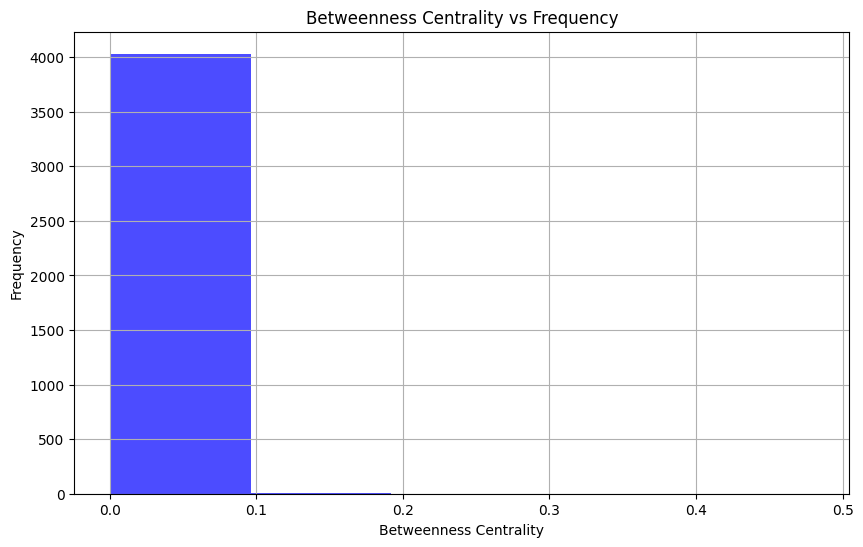

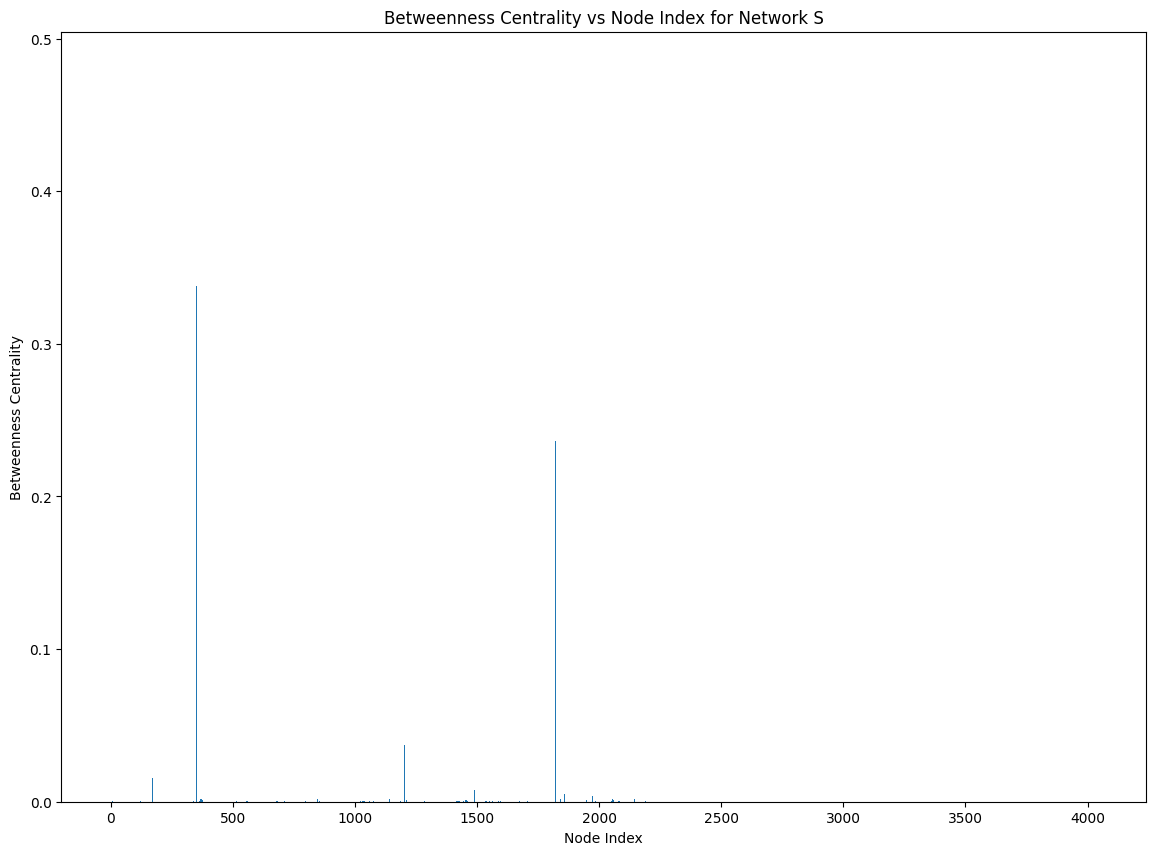

      Betweenness Centrality
107                 0.480518
1684                0.337797
3437                0.236115
1912                0.229295
1085                0.149015
0                   0.146306
698                 0.115330
567                 0.096310
58                  0.084360
428                 0.064309


In [6]:
# Calculate betweenness centrality for all nodes
betweenness_centrality = nx.betweenness_centrality(G)

# Plotting degree centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(betweenness_centrality.values(), bins=5, color='blue', alpha=0.7)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality vs Frequency')
plt.grid(True)
plt.show()


# Create a bar chart to visualize Betweenness centrality vs node index
fig, ax = plt.subplots(figsize=(14, 10))
ax.bar(range(len(betweenness_centrality)), list(betweenness_centrality.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Betweenness Centrality')
ax.set_title('Betweenness Centrality vs Node Index for Network S')
plt.show()


# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(betweenness_centrality, orient='index', columns=['Betweenness Centrality'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='Betweenness Centrality', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

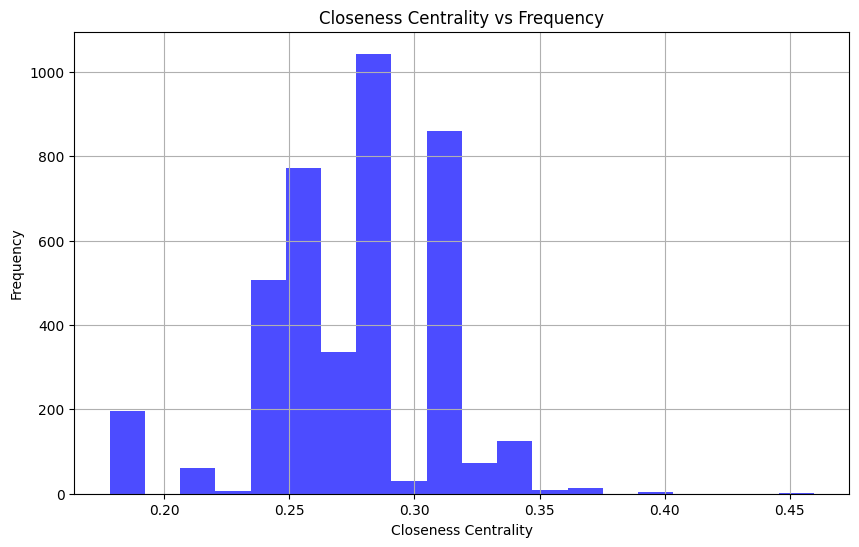

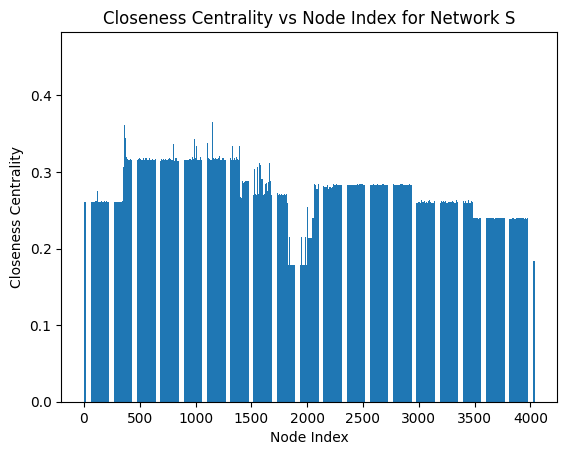

      Closeness Centrality
107               0.459699
58                0.397402
428               0.394837
563               0.393913
1684              0.393606
171               0.370493
348               0.369916
483               0.369848
414               0.369543
376               0.366558


In [7]:
# Calculate closeness centrality for all nodes
closeness_centrality = nx.closeness_centrality(G)

# Plotting degree centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(closeness_centrality.values(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality vs Frequency')
plt.grid(True)
plt.show()

# Create a bar chart to visualize closeness centrality vs node index
fig, ax = plt.subplots()
ax.bar(range(len(closeness_centrality)), list(closeness_centrality.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Closeness Centrality')
ax.set_title('Closeness Centrality vs Node Index for Network S')
plt.show()

# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(closeness_centrality, orient='index', columns=['Closeness Centrality'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='Closeness Centrality', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

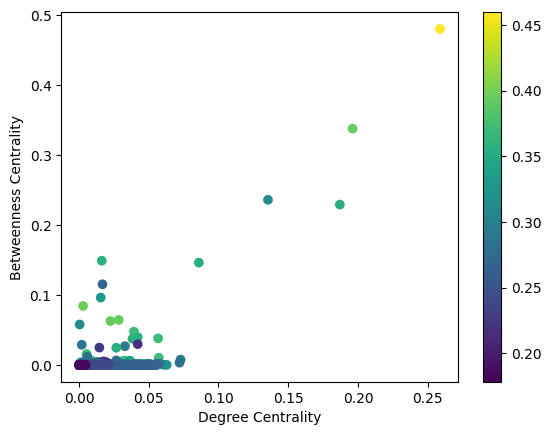

In [8]:
# Create a scatter plot to visualize the centrality measures
x = [degree_centrality[node] for node in G.nodes()]
y = [betweenness_centrality[node] for node in G.nodes()]
c = [closeness_centrality[node] for node in G.nodes()]

plt.scatter(x, y, c=c, cmap='viridis')
plt.xlabel("Degree Centrality")
plt.ylabel("Betweenness Centrality")
plt.colorbar()
plt.show()

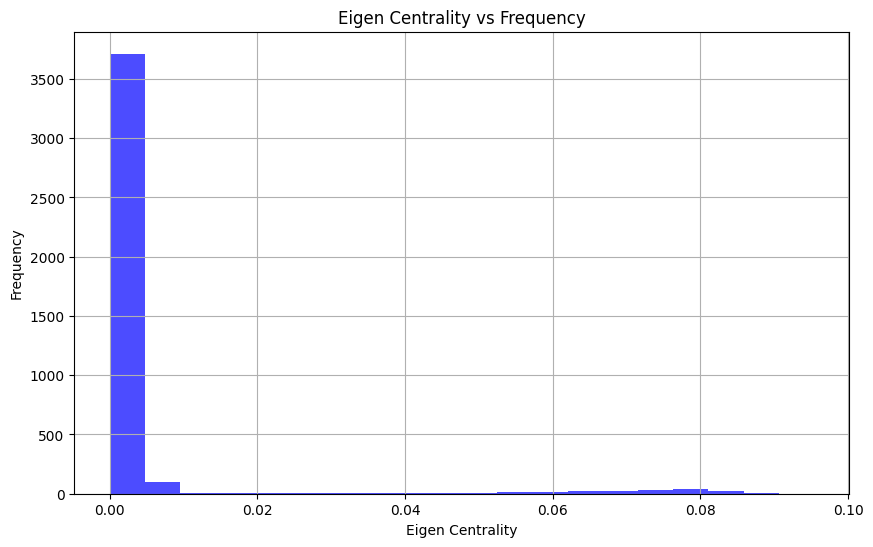

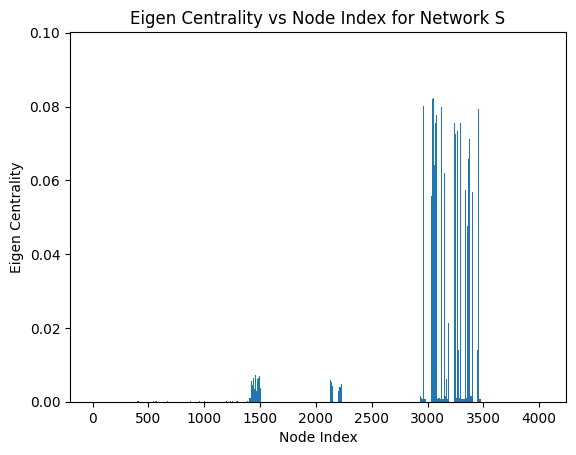

      Eigenvalue Centrality
1912               0.095407
2266               0.086983
2206               0.086052
2233               0.085173
2464               0.084279
2142               0.084193
2218               0.084156
2078               0.084136
2123               0.083671
1993               0.083532


In [9]:
# Calculate eigen vector centrality for all nodes
eigen_centrality = nx.eigenvector_centrality(G)

# Plotting degree centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(eigen_centrality.values(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Eigen Centrality')
plt.ylabel('Frequency')
plt.title('Eigen Centrality vs Frequency')
plt.grid(True)
plt.show()

# Create a bar chart to visualize closeness centrality vs node index
fig, ax = plt.subplots()
ax.bar(range(len(eigen_centrality)), list(eigen_centrality.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Eigen Centrality')
ax.set_title('Eigen Centrality vs Node Index for Network S')
plt.show()

# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(eigen_centrality, orient='index', columns=['Eigenvalue Centrality'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='Eigenvalue Centrality', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

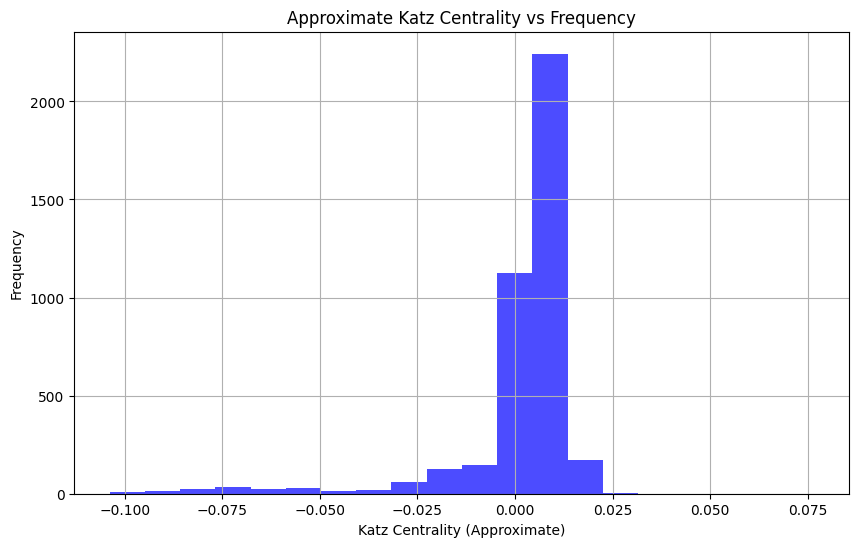

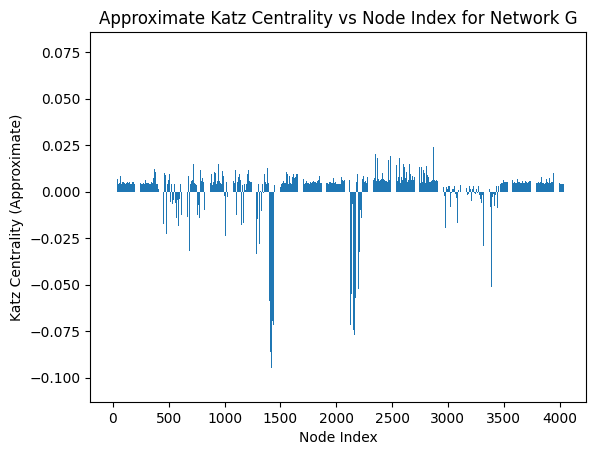

      Katz Centrality (Approximate)
1684                       0.076634
3437                       0.033340
2839                       0.024817
483                        0.024428
3363                       0.024178
2754                       0.022909
3426                       0.021558
2966                       0.021341
3232                       0.021237
3078                       0.020959


In [10]:
warnings.filterwarnings("ignore", category=FutureWarning)
# Calculate approximate Katz centrality
katz_centrality_approx = nx.katz_centrality_numpy(G, alpha=0.01, beta=0.1)

# Plotting Katz centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(katz_centrality_approx.values(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Katz Centrality (Approximate)')
plt.ylabel('Frequency')
plt.title('Approximate Katz Centrality vs Frequency')
plt.grid(True)
plt.show()

# Create a bar chart to visualize Katz centrality vs node index
fig, ax = plt.subplots()
ax.bar(range(len(katz_centrality_approx)), list(katz_centrality_approx.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Katz Centrality (Approximate)')
ax.set_title('Approximate Katz Centrality vs Node Index for Network G')
plt.show()

# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(katz_centrality_approx, orient='index', columns=['Katz Centrality (Approximate)'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='Katz Centrality (Approximate)', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

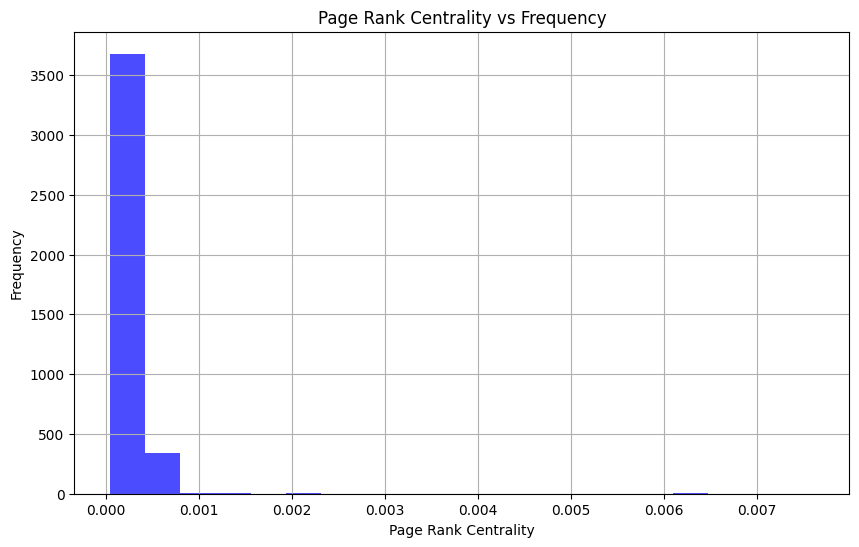

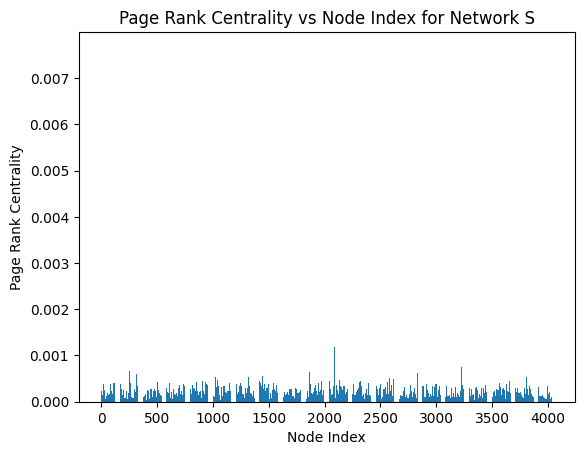

      PageRank Centrality
3437             0.007615
107              0.006936
1684             0.006367
0                0.006290
1912             0.003877
348              0.002348
686              0.002219
3980             0.002170
414              0.001800
698              0.001317


In [11]:
# Calculate PageRank centrality for all nodes
page_rank_centrality = nx.pagerank(G)

# Plotting degree centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(page_rank_centrality.values(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Page Rank Centrality')
plt.ylabel('Frequency')
plt.title('Page Rank Centrality vs Frequency')
plt.grid(True)
plt.show()

# Create a bar chart to visualize page Rank centrality vs node index
fig, ax = plt.subplots()
ax.bar(range(len(page_rank_centrality)), list(page_rank_centrality.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Page Rank Centrality')
ax.set_title('Page Rank Centrality vs Node Index for Network S')
plt.show()

# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(page_rank_centrality, orient='index', columns=['PageRank Centrality'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='PageRank Centrality', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

# DATASET - B

LastFM Asia Social Network

In [12]:
'''
'lastfm_asia_edges.csv', 
'lastfm_asia_features.json', 
'lastfm_asia_target.csv', 
'README.txt'
'''

# Step 1: Read the edge list from the CSV file
edge_list_file = 'lastfm_asia_edges.csv'
edges_df = pd.read_csv(edge_list_file)

# Step 2: Read the node features from the JSON file
features_file = 'lastfm_asia_features.json'
with open(features_file, 'r') as f:
    node_features = json.load(f)

# Step 3: Create a graph and add nodes and edges
G = nx.Graph()

# Assuming features is a list
for node_id, features in node_features.items():
    G.add_node(int(node_id), features=features)

# Add edges
for index, row in edges_df.iterrows():
    G.add_edge(row['node_1'], row['node_2'])

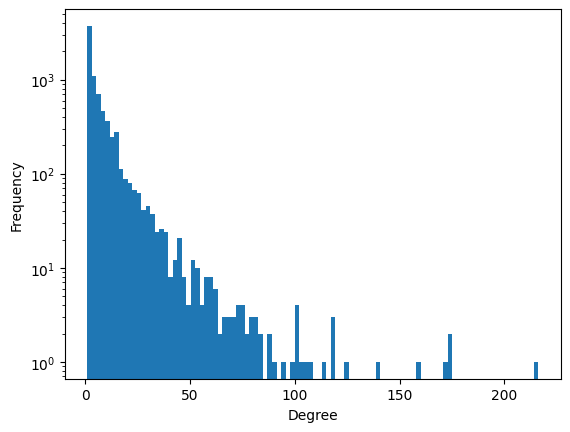

In [13]:
# Calculate the degree distribution for all nodes
degrees = [G.degree(node) for node in G.nodes()]

# Plot the degree distribution as a histogram
plt.hist(degrees, bins=100,log=True)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [14]:
# Find the node with the lowest degree
min_degree_node = min(G.nodes(), key=G.degree)
min_degree = G.degree(min_degree_node)

print("Node with lowest degree:", min_degree_node)
print("Minimum degree of any node:", min_degree)


# Find the node with the highest degree
max_degree_node = max(G.nodes(), key=G.degree)
max_degree = G.degree(max_degree_node)

print("Node with highest degree:", max_degree_node)
print("Maximum degree of any node:", max_degree)


# Calculate the average degree of the network
total_degree = sum(dict(G.degree()).values())
average_degree = total_degree / len(G)
print("Average degree of the network:", average_degree)

# Calculate average local clustering coefficient
avg_local_clustering = nx.average_clustering(G)
print("Average Local Clustering Coefficient:", avg_local_clustering)

# Calculate global clustering coefficient (transitivity)
transitivity_value = nx.transitivity(G)
print("Global Clustering Coefficient / Transitivity of the network:", transitivity_value)

Node with lowest degree: 0
Minimum degree of any node: 1
Node with highest degree: 7237
Maximum degree of any node: 216
Average degree of the network: 7.2943336831059815
Average Local Clustering Coefficient: 0.21941842432708525
Global Clustering Coefficient / Transitivity of the network: 0.178622548153384


# Consider 6 Centrality Measures mentioned below for the nodes in the network

■ Degree Centrality
■ EigenVector Centrality
■ Katz Centrality
■ PageRank Centrality
■ Betweenness Centrality
■ Closeness Centrality

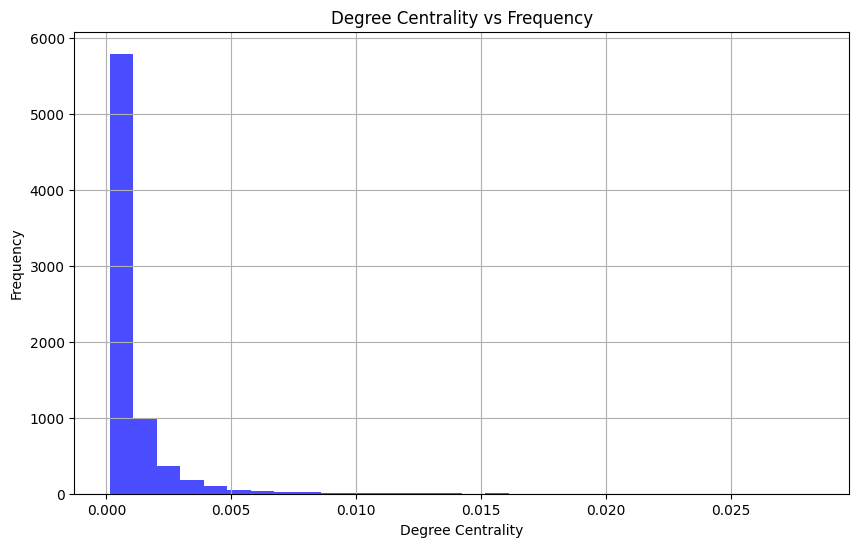

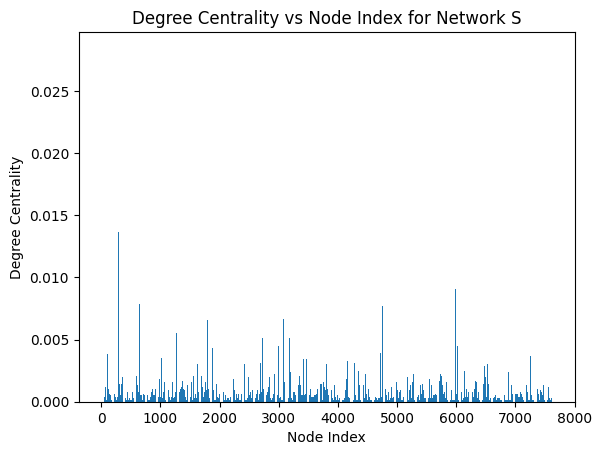

      Degree Centrality
7237           0.028335
3530           0.022957
4785           0.022826
524            0.022563
3450           0.020858
2510           0.018365
3597           0.016267
6101           0.015611
2854           0.015611
5127           0.015611


In [15]:
# Calculate degree centrality for all nodes
degree_centrality = nx.degree_centrality(G)

# Plotting degree centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(degree_centrality.values(), bins=30, color='blue', alpha=0.7)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality vs Frequency')
plt.grid(True)
plt.show()

# Create a bar chart to visualize degree centrality vs node index
fig, ax = plt.subplots()
ax.bar(range(len(degree_centrality)), list(degree_centrality.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Degree Centrality')
ax.set_title('Degree Centrality vs Node Index for Network S')
plt.show()

# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['Degree Centrality'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='Degree Centrality', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

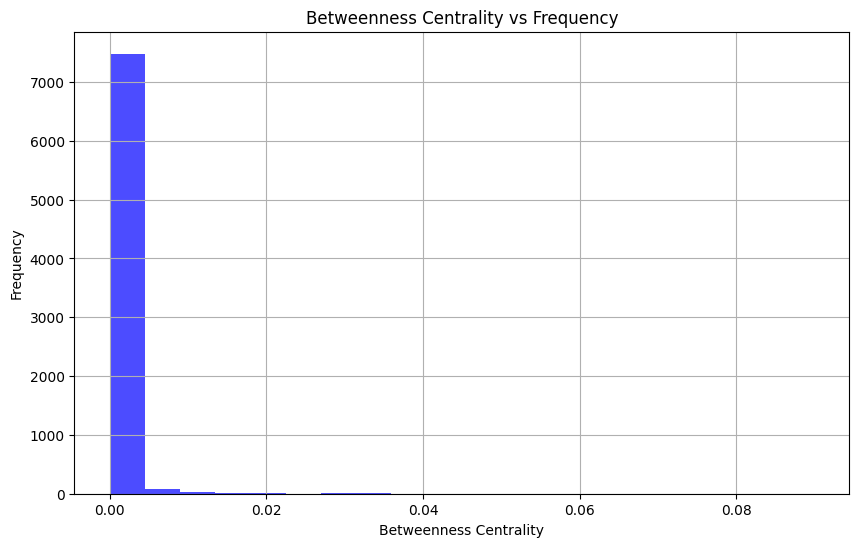

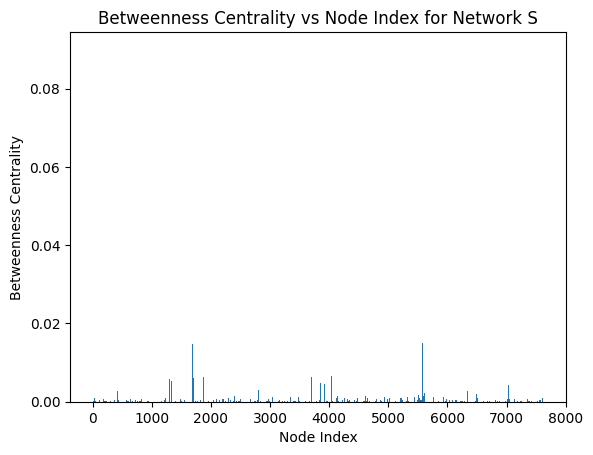

      Betweenness Centrality
7199                0.089931
7237                0.085589
2854                0.077563
4356                0.067250
6101                0.051805
5454                0.043614
4338                0.042899
5127                0.038412
3450                0.036933
4785                0.034961


In [16]:
# Calculate betweenness centrality for all nodes
betweenness_centrality = nx.betweenness_centrality(G)

# Plotting degree centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(betweenness_centrality.values(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality vs Frequency')
plt.grid(True)
plt.show()


# Create a bar chart to visualize Betweenness centrality vs node index
fig, ax = plt.subplots()
ax.bar(range(len(betweenness_centrality)), list(betweenness_centrality.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Betweenness Centrality')
ax.set_title('Betweenness Centrality vs Node Index for Network S')
plt.show()

# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(betweenness_centrality, orient='index', columns=['Betweenness Centrality'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='Betweenness Centrality', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

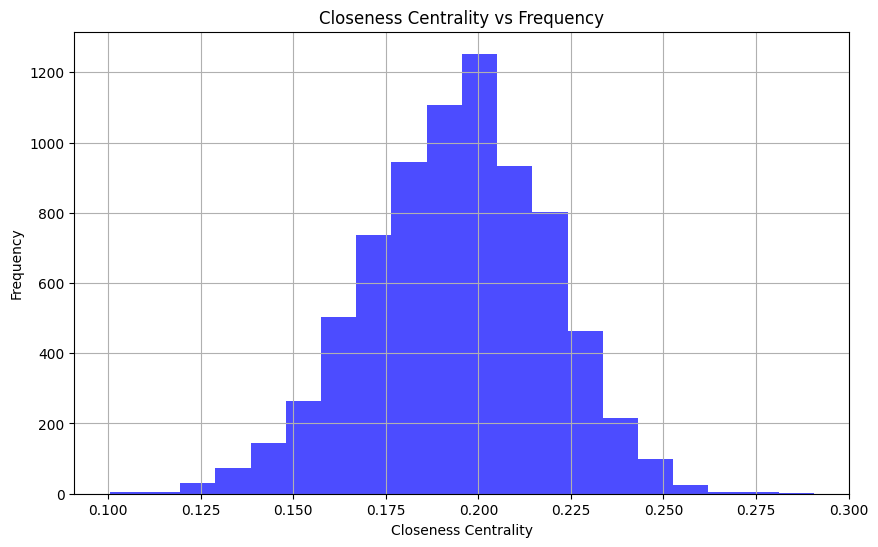

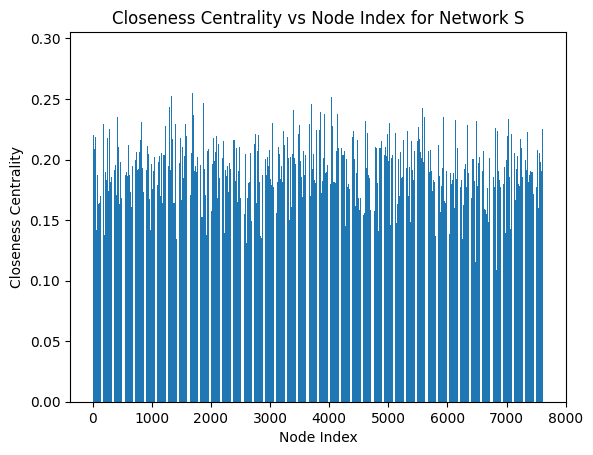

      Closeness Centrality
7199              0.290710
7237              0.285677
4356              0.281603
2854              0.280350
5454              0.279825
5127              0.274643
3544              0.273471
6101              0.273294
3450              0.272172
4900              0.269145


In [17]:
# Calculate closeness centrality for all nodes
closeness_centrality = nx.closeness_centrality(G)

# Plotting degree centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(closeness_centrality.values(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality vs Frequency')
plt.grid(True)
plt.show()

# Create a bar chart to visualize closeness centrality vs node index
fig, ax = plt.subplots()
ax.bar(range(len(closeness_centrality)), list(closeness_centrality.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Closeness Centrality')
ax.set_title('Closeness Centrality vs Node Index for Network S')
plt.show()

# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(closeness_centrality, orient='index', columns=['Closeness Centrality'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='Closeness Centrality', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

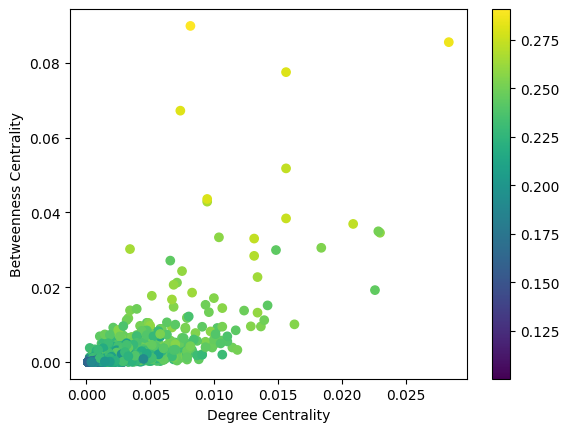

In [18]:
# Create a scatter plot to visualize the centrality measures
x = [degree_centrality[node] for node in G.nodes()]
y = [betweenness_centrality[node] for node in G.nodes()]
c = [closeness_centrality[node] for node in G.nodes()]

plt.scatter(x, y, c=c, cmap='viridis')
plt.xlabel("Degree Centrality")
plt.ylabel("Betweenness Centrality")
plt.colorbar()
plt.show()

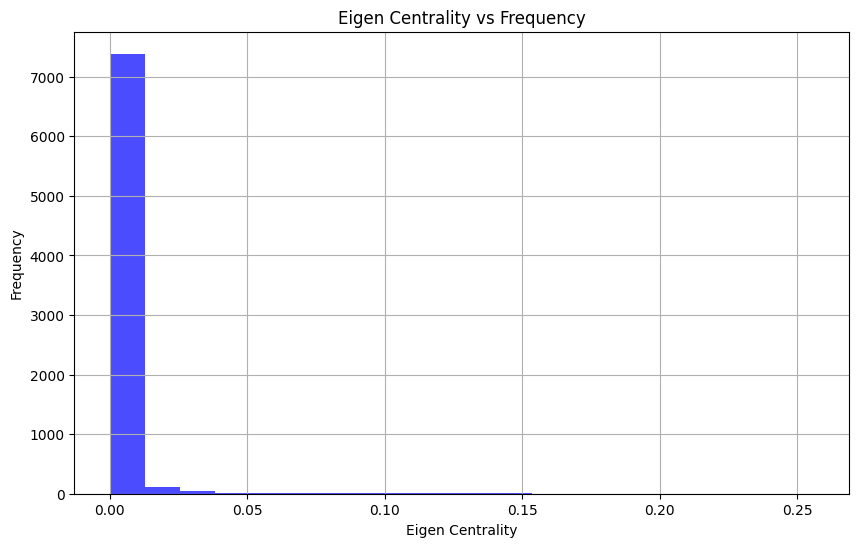

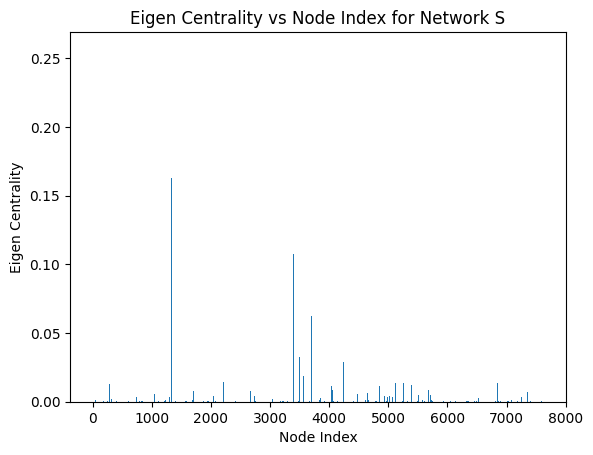

      Eigenvalue Centrality
7237               0.256134
3240               0.196578
3597               0.190829
763                0.181685
378                0.164246
2083               0.162721
1334               0.162531
3544               0.151874
4809               0.151282
2734               0.146488


In [19]:
# Calculate eigen vector centrality for all nodes
eigen_centrality = nx.eigenvector_centrality(G)

# Plotting degree centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(eigen_centrality.values(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Eigen Centrality')
plt.ylabel('Frequency')
plt.title('Eigen Centrality vs Frequency')
plt.grid(True)
plt.show()

# Create a bar chart to visualize closeness centrality vs node index
fig, ax = plt.subplots()
ax.bar(range(len(eigen_centrality)), list(eigen_centrality.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Eigen Centrality')
ax.set_title('Eigen Centrality vs Node Index for Network S')
plt.show()

# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(eigen_centrality, orient='index', columns=['Eigenvalue Centrality'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='Eigenvalue Centrality', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

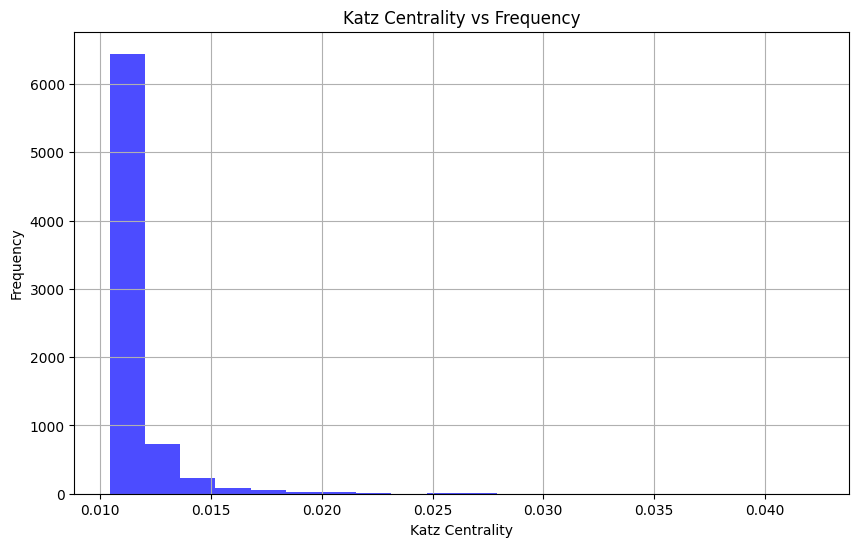

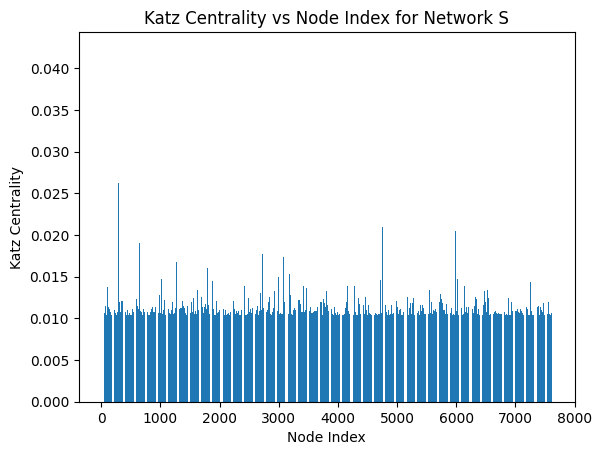

      Katz Centrality (Approximate)
1684                       0.076634
3437                       0.033340
2839                       0.024817
483                        0.024428
3363                       0.024178
2754                       0.022909
3426                       0.021558
2966                       0.021341
3232                       0.021237
3078                       0.020959


In [20]:
# Calculate Katz centrality for all nodes
alpha = 0.01
beta = 0.1
max_iter = 5000  # increased from default of 1000
tol = 1e-8  # reduced from default of 1e-6
katz_centrality = nx.katz_centrality(G, alpha=alpha, beta=beta, max_iter=max_iter, tol=tol)

# Plotting degree centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(katz_centrality.values(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Katz Centrality')
plt.ylabel('Frequency')
plt.title('Katz Centrality vs Frequency')
plt.grid(True)
plt.show()

# Create a bar chart to visualize Katz centrality vs node index
fig, ax = plt.subplots()
ax.bar(range(len(katz_centrality)), list(katz_centrality.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Katz Centrality')
ax.set_title('Katz Centrality vs Node Index for Network S')
plt.show()

# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(katz_centrality_approx, orient='index', columns=['Katz Centrality (Approximate)'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='Katz Centrality (Approximate)', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))

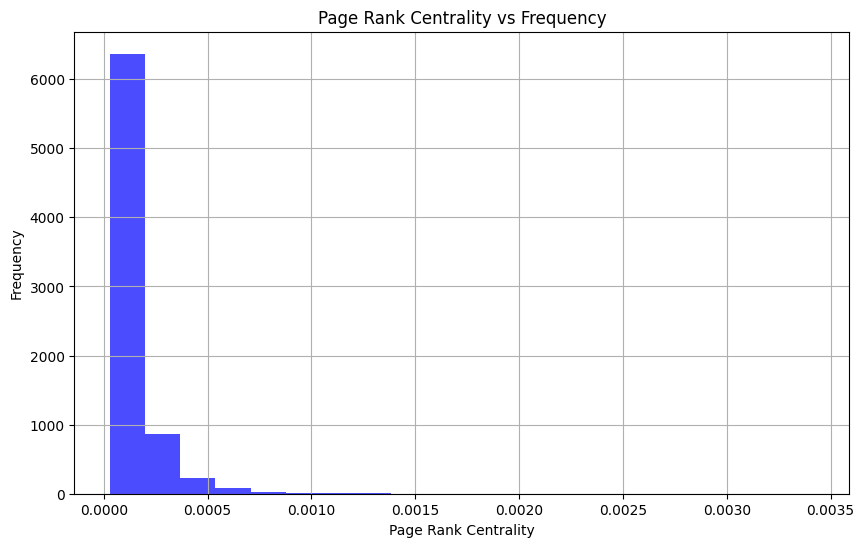

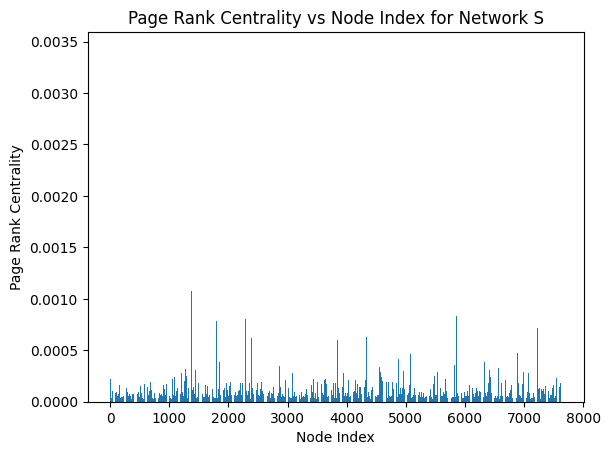

      PageRank Centrality
4811             0.003421
4785             0.003261
3530             0.002719
7237             0.002581
3450             0.002431
2854             0.002356
2510             0.002317
524              0.001967
5127             0.001886
6101             0.001776


In [21]:
# Calculate PageRank centrality for all nodes
page_rank_centrality = nx.pagerank(G)

# Plotting degree centrality vs frequency (histogram)
plt.figure(figsize=(10, 6))
plt.hist(page_rank_centrality.values(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Page Rank Centrality')
plt.ylabel('Frequency')
plt.title('Page Rank Centrality vs Frequency')
plt.grid(True)
plt.show()

# Create a bar chart to visualize page Rank centrality vs node index
fig, ax = plt.subplots()
ax.bar(range(len(page_rank_centrality)), list(page_rank_centrality.values()))
ax.set_xlabel('Node Index')
ax.set_ylabel('Page Rank Centrality')
ax.set_title('Page Rank Centrality vs Node Index for Network S')
plt.show()

# Convert centrality dictionary to DataFrame
centrality_df = pd.DataFrame.from_dict(page_rank_centrality, orient='index', columns=['PageRank Centrality'])
# Sort DataFrame by centrality values in descending order
centrality_df = centrality_df.sort_values(by='PageRank Centrality', ascending=False)
# Print top 10 centrality values
print(centrality_df.head(10))